<a href="https://colab.research.google.com/github/Manishkatel/Face_Mask_Detection_Model/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd

In [3]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Face_Mask_Detection/face_mask_detection/face_mask_detection"


In [4]:
train_csv_path = os.path.join(dataset_path, "Training_set_face_mask.csv")
test_csv_path = os.path.join(dataset_path, "Testing_set_face_mask.csv")

In [5]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [6]:
print(train_df.head())
print(train_df.tail())

      filename         label
0  Image_1.jpg  without_mask
1  Image_2.jpg  without_mask
2  Image_3.jpg  without_mask
3  Image_4.jpg  without_mask
4  Image_5.jpg  without_mask
              filename      label
11259  Image_11260.jpg  with_mask
11260  Image_11261.jpg  with_mask
11261  Image_11262.jpg  with_mask
11262  Image_11263.jpg  with_mask
11263  Image_11264.jpg  with_mask


In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
train_images_path = os.path.join(dataset_path, "train")

In [9]:
sample_image_path = os.path.join(train_images_path, train_df.iloc[0]["filename"])
image = cv2.imread(sample_image_path)

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

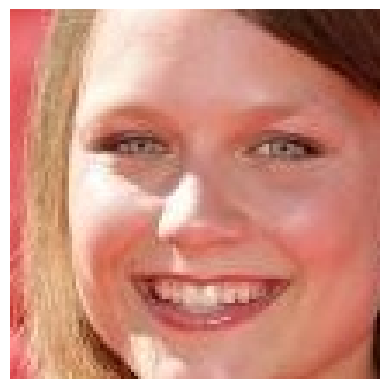

In [11]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [12]:
# Load OpenCV's pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [13]:
# Test on a single image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


In [14]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)


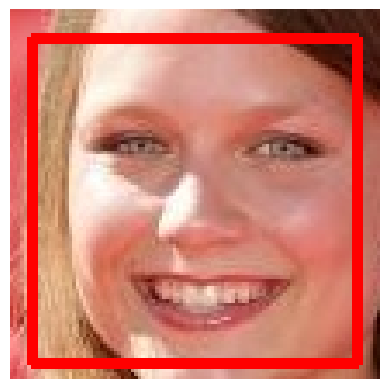

In [15]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [16]:
import numpy as np

X_train = []  # Store images
y_train = []  # Store labels

for index, row in train_df.iterrows():
    image_path = os.path.join(train_images_path, row['filename'])
    image = cv2.imread(image_path)

    if image is None:
        continue  # Skip if image not found

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]  # Extract face region
        face_resized = cv2.resize(face_roi, (50, 50))  # Resize to 50x50

        X_train.append(face_resized.flatten())  # Flatten image into 1D array
        y_train.append(1 if row["label"] == "with_mask" else 0)  # Convert label to binary

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Dataset ready! Shape:", X_train.shape)


Dataset ready! Shape: (7232, 2500)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Validate Model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 87.70%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


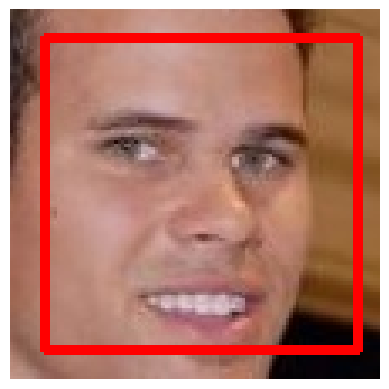

In [18]:
# Load a test image
test_images_path = os.path.join(dataset_path, "test")
test_image_path = os.path.join(test_images_path, test_df.iloc[0]["filename"])
test_image = cv2.imread(test_image_path)

# Convert to grayscale and detect face
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    face_roi = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face_roi, (50, 50)).flatten().reshape(1, -1)

    prediction = model.predict(face_resized)
    label = "With Mask" if prediction[0] == 1 else "Without Mask"

    # Draw bounding box and label
    color = (0, 255, 0) if prediction[0] == 1 else (0, 0, 255)
    cv2.rectangle(test_image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(test_image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Convert image to RGB for display
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(test_image)
plt.axis("off")
plt.show()
